<a href="https://colab.research.google.com/github/Tanishasi/Case-Study/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
col_names=["user_id", "item_id","rating","timestamp"]
df=pd.read_csv('/content/u.data',sep='\t', names=col_names)

In [ ]:

df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
df.shape

(100000, 4)

In [ ]:
df['user_id'].nunique()

943

In [ ]:
df['item_id'].nunique()

1682

In [ ]:
movies_title=pd.read_csv('/content/u.item', sep="\|", header=None, encoding='latin1')
# concered about movie name and id first two columns

In [ ]:
movies_title.shape

(1682, 24)

In [ ]:
movies_title=movies_title[[0,1]]

In [ ]:
movies_title.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
movies_title.columns=['item_id','title']

In [ ]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
# merging both data sets
df=pd.merge(df,movies_title,on='item_id')

In [ ]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


In [ ]:
# exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
# finding avg rating
# group titles and use mean fxn on it
# use only rating
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()
# if one person has rated 5 star ..avoid moviews with less no. of ratings

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [ ]:
df.groupby('title').count()['rating'].sort_values()
#

,rating
title,
Á köldum klaka (Cold Fever) (1994),1
Mille bolle blu (1993),1
Mat' i syn (1997),1
Marlene Dietrich: Shadow and Light (1996),1
"Man from Down Under, The (1943)",1
...,...
Liar Liar (1997),485
Return of the Jedi (1983),507
Fargo (1996),508


In [ ]:
# create dataframe of rating
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [ ]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [ ]:
ratings['no. of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [ ]:
ratings

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [ ]:
ratings.sort_values(by='rating',ascending=False)

,rating,no. of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


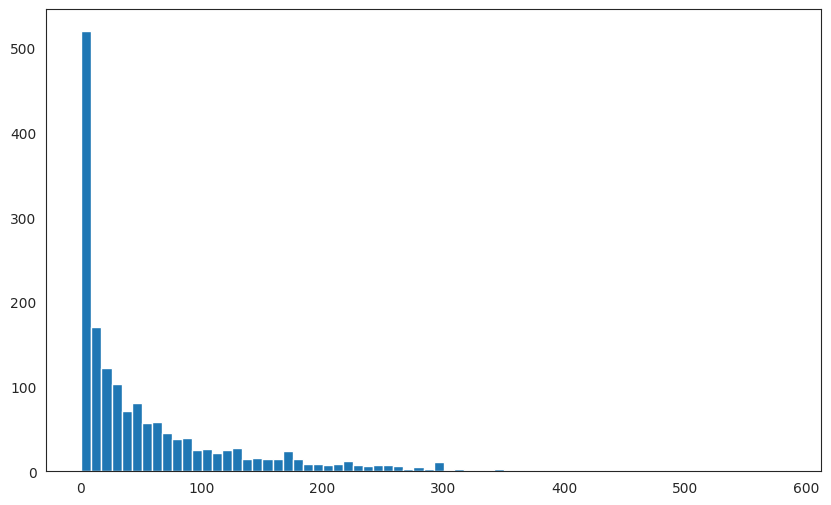

In [ ]:
# x-> no. of user (10 log) y=> kitni movie hr aisi movie 10 log ne
plt.figure(figsize=(10,6))
plt.hist(ratings['no. of ratings'],bins=70)
plt.show()

In [ ]:
# how many movies with this rating
plt.hist(ratings['rating'],bins=100)

NameError: name 'plt' is not defined

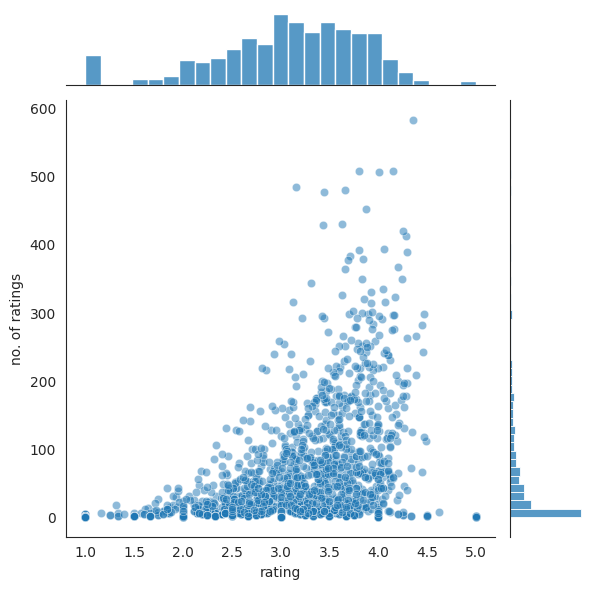

In [ ]:
# joint plot for how no. of rating and actual avg rating varies. if rating inc whether the frequency increase or not
sns.jointplot(x='rating',y='no. of ratings', data=ratings,alpha=0.5)
# as the avg rating increases the avg  no. of rating of that movie also increases
# linear trend

In [ ]:
# creating movie recommendation
# lets create a matrix where  row has user id and movie title on another(column)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [ ]:
mov_matrix=df.pivot_table(index='user_id',columns='title',values='rating')

In [ ]:
ratings.sort_values('no. of ratings',ascending=False).head()

,rating,no. of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [ ]:
starwars_user=mov_matrix['Star Wars (1977)']

In [ ]:
# we correlate this starwar series with the whole movie_matrix-> correlation of each move?
similar=mov_matrix.corrwith(starwars_user)  #how correlated is this star war movie with other movies

In [ ]:
# drop nan values...no person that has rated nan then correlation doesnt exist
corr_starwars=pd.DataFrame(similar,columns=['Correlation'])

In [ ]:
corr_starwars.dropna(inplace=True) #change original object

In [ ]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [ ]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
# less no. of perople who rated movie a as 5 and star wars as 5 is highly correlated but we dont need that
# onlysuggest moview that have been rated by atleast 100 user
# filteration-> putting a threshold
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [ ]:
ratings

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [ ]:
# we can join these dfs
corr_starwars=corr_starwars.join(ratings['no. of ratings'])

In [ ]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values(ascending=False,by='Correlation').head()

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
# create a predict function that take movie as input and gives a recommedsation
Xx

In [ ]:
predict_movies('Titanic (1997)')

,Correlation,no. of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
